<a href="https://colab.research.google.com/github/Shashwat-23/AirBnB_Booking_Analysis/blob/main/AirBnb__Bookings__Analysis_eda_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **AirBnb Bookings Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -Shashwat Kulkarni**


# **Project Summary -**

### **Breakdown of this Notebook:**

1.**Importing Libraries**

2.**Loading the dataset**

3.**Data Cleaning:**

*   Dropping duplicates.
*   Cleaning individual columns.
*   Remove the Null values from the dataset
*   Some Transformations

4.**Data Analysis and Visualization:** Using plots to find relations between the features

* What is the average preferred price by customers according to the location?

* Number of active hosts per location (Where most of the hosts focused to own  property?)

* Where the customer pays the highest and lowest rent according to location?

* Most popular/demanded host of Airbnb in New York

* Find the total count of each room type

* Room types and their relation with availability in different neighbourhood groups

* Which are the top 25 most used words in listing names?

* Find top 10 hosts with most listings

* Find the top three hosts based on their turnover

* Find total no. of nights spend per location

* Total no. of nights spends per room types

* Top 10 highest listing neighborhood




# **GitHub Link -**

https://gist.github.com/Shashwat-23/172f901d3782cd7b6ef4c990746577f9

# **Problem Statement**


**To study the airbnb dataset,and to remove irregularities and visualize key findings.**

#### **Define Your Business Objective?**

**To study the airbnb dataset,and to get to know where,when and what customers or consumers are using and preferring the property.From that study we can improve our Business ideology.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns

### Dataset Loading

In [ ]:
#Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Shashwat Kulkarni AlmaBetter/Copy of Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# Get count duplicates multiple columns using dataframe.pivot_table()
df2 = df.pivot_table(index = ['host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], aggfunc ='size')
print(df2)


host_name                 neighbourhood_group  neighbourhood       latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365
'Cil                      Queens               Astoria             40.76914  -73.92118  Private room     120    2               240                2019-07-01   5.22               1                               298                 1
(Ari) HENRY LEE           Manhattan            East Harlem         40.78938  -73.94679  Entire home/apt  140    7               3                  2017-12-08   0.06               1                               56                  1
(Email hidden by Airbnb)  Brooklyn             Clinton Hill        40.68274  -73.96367  Entire home/apt  261    1               5                  2016-08-23   0.14               1                               0                   1
                          Manhattan            Midtown             40.762

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

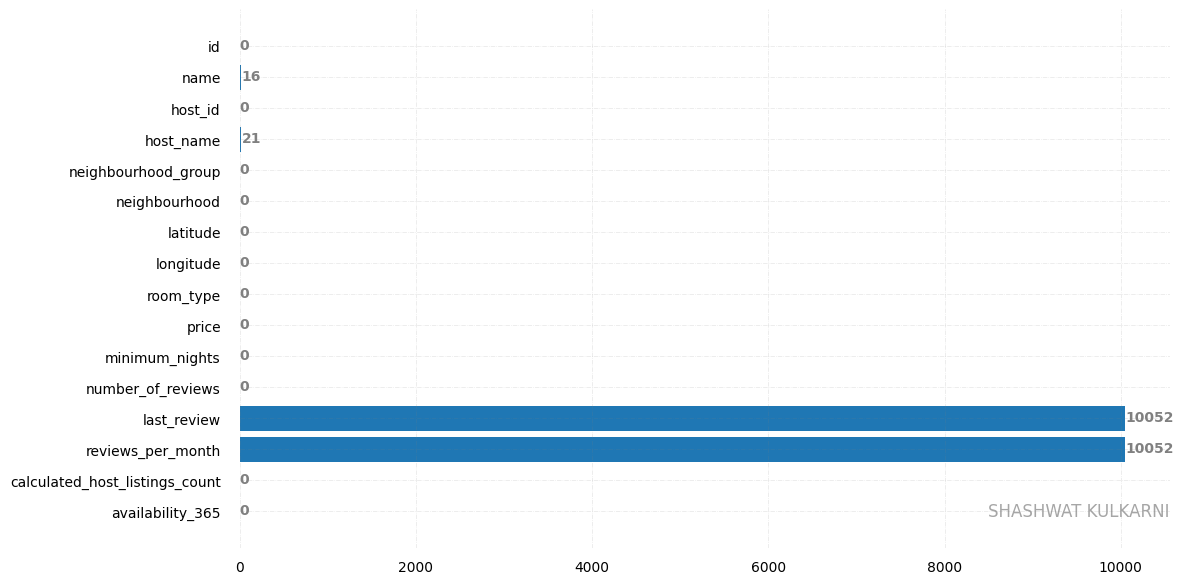

In [ ]:
# Visualizing the missing values
a=df.isnull().sum()
type(a)
b=dict(a)
col_name = list(b.keys())
null_values = list(b.values())

# Figure Size
fig, ax = plt.subplots(figsize =(12, 7))

# Horizontal Bar Plot
ax.barh(col_name, null_values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Text watermark
fig.text(0.9, 0.15, 'SHASHWAT KULKARNI', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

Answer Here:
In this case variables are column names ,which are used to store values & gives data to the computer for processing.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
a=['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
for i in a:
  print(df[i].value_counts().reset_index())
# df['name'].value_counts().reset_index()

          index  id
0          2539   1
1      25583366   1
2      25551687   1
3      25552076   1
4      25554120   1
...         ...  ..
48890  13121809   1
48891  13122135   1
48892  13122318   1
48893  13122932   1
48894  36487245   1

[48895 rows x 2 columns]
                                                   index  name
0                                         Hillside Hotel    18
1                                    Home away from home    17
2                           New york Multi-unit building    16
3                                     Brooklyn Apartment    12
4                       Loft Suite @ The Box House Hotel    11
...                                                  ...   ...
47900                     Large 1BR Apt. in Williamsburg     1
47901                                       Feel at Home     1
47902  Spacious Modern Alcove Studio in a Luxury Buil...     1
47903                   Artist's Room in Large Apartment     1
47904  Trendy duplex in the very heart of

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Remove latitude, longitude, last_review and reviews_per_month columns from original dataset
df.drop(df.columns[[6,7,12,13]], axis=1, inplace=True)

In [ ]:
#we apply dropna() function to entire dataset and drop null values with dropna() function
airbnb_df = df.dropna()

In [ ]:
#Information about our new non null dataframe
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [ ]:
#identify the observations where minimum nights is 1 and price is minimum
airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,Shared room,10,1,0,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,Entire home/apt,10,1,43,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,Entire home/apt,6800,1,0,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,Entire home/apt,7500,1,0,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,Private room,7500,1,8,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,Entire home/apt,7703,1,0,12,146


#Points to be noted:

1. Here we can see that there is minimum price 0$.We have to fix it anyway because Airbnb is not provide free stay in any hotel.  
Solution: For that we check where the price is 0. We create one funtion in which as per minimum nights the price will be set as per formula [Refer below cells for more detail]

2. There are some entries in dataset in which minimum nights = 1 but it's respective price is 0
 Solution: We replace the price value with the mean value of price which amount is less than 100$. [Refer below cells for more detail]

In [ ]:
#identify the observations where minimum nights is 1 and price is minimum
airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,Shared room,10,1,0,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,Entire home/apt,10,1,43,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,Entire home/apt,6800,1,0,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,Entire home/apt,7500,1,0,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,Private room,7500,1,8,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,Entire home/apt,7703,1,0,12,146


In [ ]:
#Get the number of values which price is less than 100$
airbnb_df.loc[airbnb_df['price'] < 100,'price'].count()

21861

In [ ]:
#Make a copy of original dataframe to perform additional operation for get the desire result
airbnb_price_df = airbnb_df.copy()

In [ ]:
#Find the mean value of price which value is less than 100$
round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())

65

In [ ]:
#Change the value of price where minimum night = 1 and price of their property is less than 50$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] <= 50) & (airbnb_price_df['minimum_nights'] == 1) ,round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()) , airbnb_price_df['price']
   )

In [ ]:
#still 8 rows have amount = 0$
airbnb_price_df[airbnb_price_df['price']==0].count()

id                                8
name                              8
host_id                           8
host_name                         8
neighbourhood_group               8
neighbourhood                     8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
calculated_host_listings_count    8
availability_365                  8
dtype: int64

In [ ]:
#Find the observations where price is 0$
airbnb_price_df[airbnb_price_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,5,6,139


In [ ]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price = round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

In [ ]:
#Replace the value of price according to minimum night where price = 0$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] == 0) ,price_calculator(airbnb_price_df['minimum_nights']) , airbnb_price_df['price'])

In [ ]:
#New description of dataset
airbnb_price_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,153.846801,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.078850,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


### What all manipulations have you done and insights you found?

##Answer Here.
1. Here we saw that there is minimum price 0$.We fixed it anyway because Airbnb is not provide free stay in any hotel.  
Solution: For that we check where the price is 0.So create one funtion in which as per minimum nights the price will be set as per formula

2. There were some entries in dataset in which minimum nights = 1 but it's respective price is 0
 Solution: We replaced the price value with the mean value of price which amount is less than 100$.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# What is the average preferred price by customers according to the location?
#Average_price of property according to the location
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

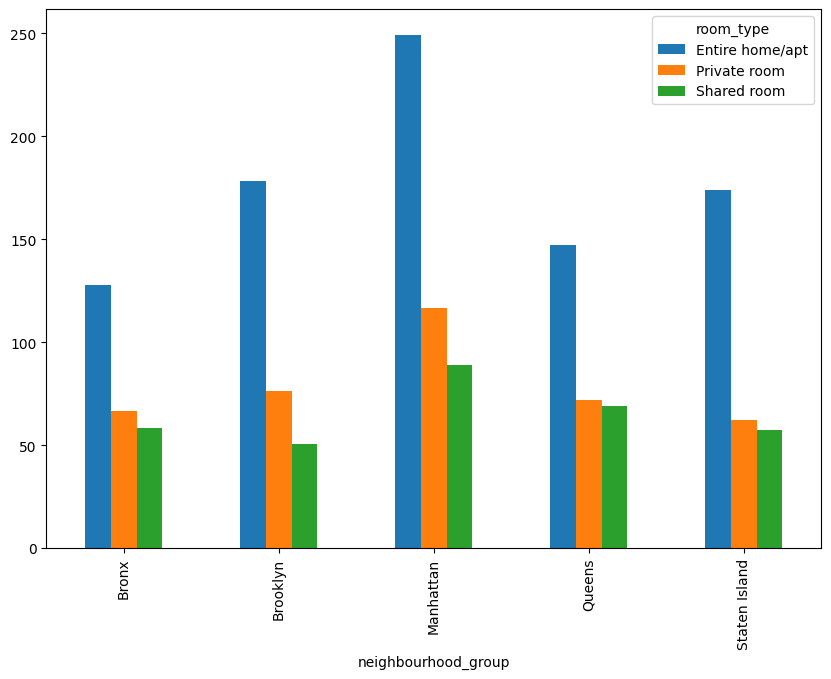

In [ ]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here. To know which kind of rooms/property should be made available ,at the respective place

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- in Bronx,Brooklyn,Manhattan,Queens,Staten island the most selling properties are entire home/apartment

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer :- Yes, surely ,by knowing at which city the most preferred price according to their rooms/proprty corresponding to that city

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#2. No. of active host per location (Where most of the host focused to own property)
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


In [ ]:
#Take a simple format of above question without index for plot the line chart
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location

neighbourhood_group
Bronx             1089
Brooklyn         20089
Manhattan        21643
Queens            5664
Staten Island      373
Name: host_id, dtype: int64

In [ ]:
b=dict(no_of_host_per_location)
b_x=b.keys()
b_y=b.values()

Text(0.5, 0, 'Location')

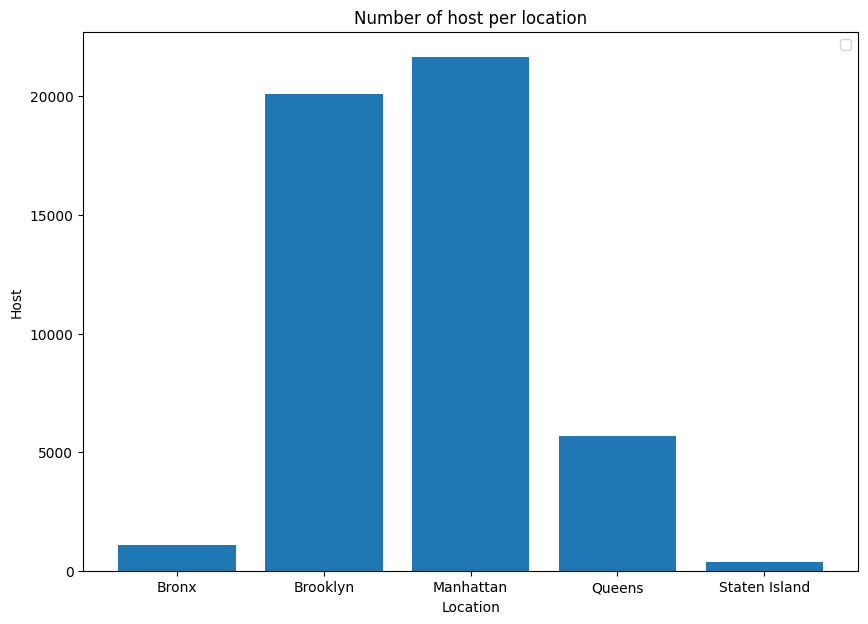

In [ ]:
#Graph
plt.legend(labels = ['No. of Host'])
plt.bar(b_x,b_y)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

##### 1. Why did you pick the specific chart?

Answer Here:-From bar chart ,we can seperately study about different city at a time .

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Manhattan , Brooklyn are most focused city by host ,so they are found to be most active locations

##### 3. Will the gained insights help creating a positive business impact?


Answer Here:-Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#3.Where the customer pays the highest and lowest rent according  to location
#Get the highest rent according to location
max_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df

,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [ ]:
#Get the lowest rent according to location
min_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
0,Bronx,20
4,Staten Island,20


In [ ]:
#Get the combine dataframe of minimum and maximum price according to location
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,10
1,Manhattan,10000,10
2,Queens,10000,10
3,Staten Island,5000,20
4,Bronx,2500,20


In [ ]:
#Create a copy of merge price dataframe
merge_price_df_copy = merge_price_df.copy()

In [ ]:
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  '''This function takes a price value as a input and give it's log values'''
  new_max_price = np.log2(values)

  return new_max_price

In [ ]:
#Apply above function on merge price dataframe
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)

In [ ]:
#Output of maximum price and minimum price after log transformation
merge_price_df_copy

,Location,Maximum price,Minimum price
0,Brooklyn,13.287712,3.321928
1,Manhattan,13.287712,3.321928
2,Queens,13.287712,3.321928
3,Staten Island,12.287712,4.321928
4,Bronx,11.287712,4.321928


Text(0.5, 1.0, 'Maximum and minimum price according to location')

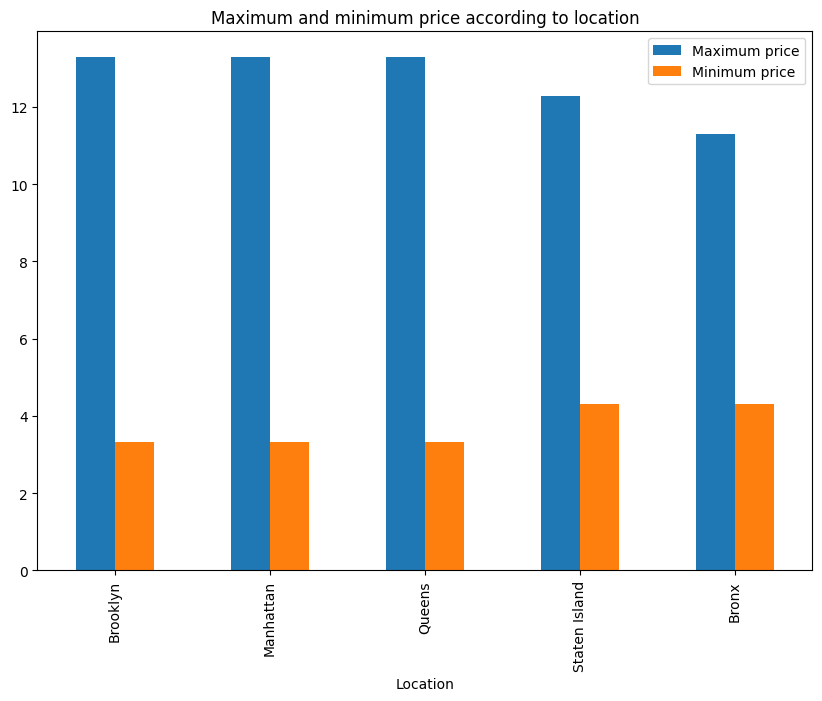

In [ ]:
#Bar graph for display maximum price and minimum price according to location
merge_price_df_copy.plot(x="Location", y=['Maximum price','Minimum price'], kind="bar")
plt.legend(labels = ['Maximum price','Minimum price'])
plt.title('Maximum and minimum price according to location')

##### 1. Why did you pick the specific chart?

Answer Here:- From Bar chart it's easy to compare how other cities are performing in terms of Business Growth.And some key/crucial decision can be taken on low performing city based on other cities which are performing well.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Manhattan,Queens and Brooklyn are having same maximum and minimum price ,and they are performing well than compared to other cities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-From above insights as compared to location,the proper strategies can be applied on cities ,which are having more minimum price than other cities ,so as to attract customers to stay at their property and increase their profit.By providing more facilities and providing more offers on Credit/Debit cards.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#4.Most Popular/demanded host of Airbnb in New york
#Get the host based on number of reviews
host_based_on_review_df = airbnb_price_df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_based_on_review_df

,host_id,host_name,number_of_reviews
21294,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18619,26432133,Danielle,2017
20863,35524316,Yasu & Akiko,1971
21911,40176101,Brady,1818
...,...,...,...
21799,39706334,Erin,0
21802,39724060,Jaime,0
21806,39731713,Polina,0
21812,39765154,Dave,0


In [ ]:
#Get the host based on availability in a year
host_based_on_availability_df = airbnb_price_df.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = True)
host_based_on_availability_df

,host_id,host_name,availability_365
0,2438,Tasos,0.0
22244,41764756,Luz,0.0
22243,41762539,Maria,0.0
22242,41760536,Austin,0.0
22241,41757762,Sara,0.0
...,...,...,...
1787,746552,Tom,365.0
27208,76862848,Alexis,365.0
22042,40733012,Victor,365.0
1829,772862,Jesse,365.0


In [ ]:
#Merge two dataframe based on number of reviews and availability in a year
popular_host_df = pd.merge(host_based_on_review_df,host_based_on_availability_df,on = ['host_id','host_name']).sort_values(['availability_365','number_of_reviews'],ascending = [True,False]).rename(columns = {'number_of_reviews':'Number of reviews','availability_365':'Availability in a year'})

popular_host_df

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0
...,...,...,...,...
37133,37360127,Mel,0,365.0
37137,37424221,Trevor,0,365.0
37225,35741633,Chen,0,365.0
37248,40834217,Jay,0,365.0


In [ ]:
#Most popular top 5 host in new york
popular_host_df.head(5)

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0


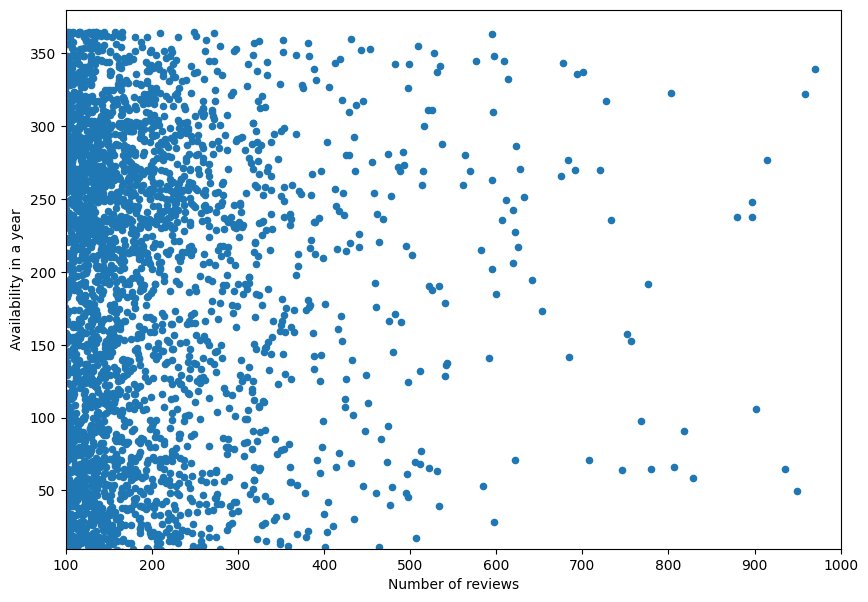

In [ ]:
#Create scatter plot based on number of reviews and availability in a year
popular_host_df.plot.scatter(x='Number of reviews', y='Availability in a year', xlim=(100,1000),ylim=(10,380));

##### 1. Why did you pick the specific chart?

Answer Here:-In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on,that's why scatter plot is being used.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- Lower number of reviews(100-200) are having high availabilty in a year(250-350).The hosts which are having Higher number of reviews are having less availability means ,they do remain occupied most of the time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-From above insights ,we gather information the property which are having less availabilty and higher no. of reviews , that property can be expanded ,so as to accomodate more no. of customers.And increase their Profit.By increasing infrastructure and providing more facilaties that attracts more customers.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
### Finding Total count of each room types
# Finding unique values from column 'room_type'
airbnb_room_type = airbnb_df.room_type.unique()

In [ ]:
airbnb_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Which is the most listed room type?
airbnb_roomtype_frequency = dict(airbnb_df.room_type.value_counts())

In [ ]:
airbnb_roomtype_frequency

{'Entire home/apt': 25393, 'Private room': 22306, 'Shared room': 1159}

Text(0.5, 1.0, 'Count of Listed Rooms')

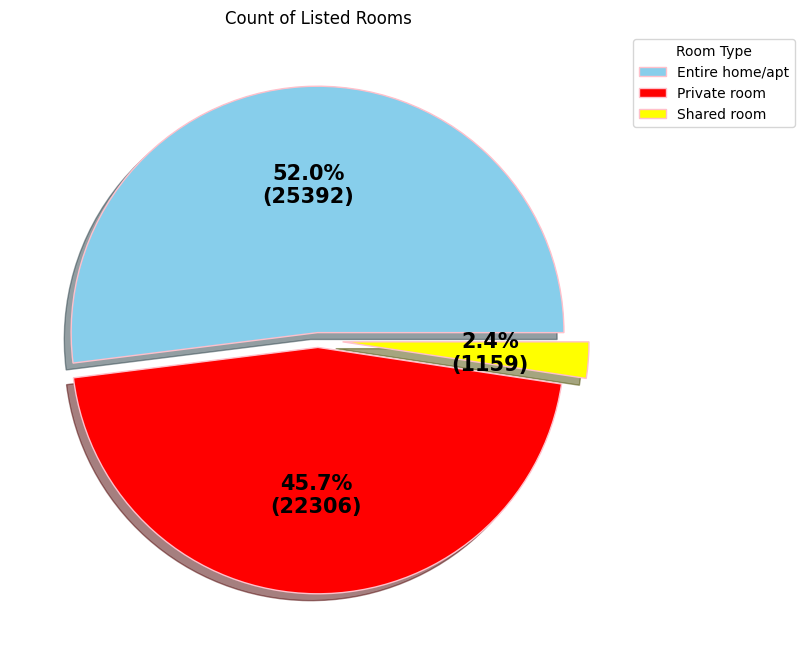

In [ ]:
# Creating Dataset

room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())

# Creating color parameters

colors = ( "skyblue", "red", "yellow",)

# Creating explode data

explode = (0.03, 0.03, 0.1)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating Pie Chart

# Creating plot
fig, airbnb_pie_chart = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct = lambda pct: func(pct, data),
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(autotexts, size = 15, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")




##### 1. Why did you pick the specific chart?

Answer Here:-A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.All the three categories volume can be seen at glance in one go and that can compared with other ,that how much share it's contributing in whole.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:The count of Shared room is less compared to others and 2.4% of whole rooms are assigned as shared room.The count of Entire home/apt and private room  is larger compared to others and 52% and 45.7% of whole rooms are assigned respectively.Because of which more profit is been earned.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:- The total count of all kind of rooms can be visualized at once.If any changes in room allocation as per category can be easily identified. By changing the propostion percentage of each category ,the profit calculated is compared with earlier profits gained.In which the distribution of percentage in each category ,whose Profit is maximum, that model is being assumed as best model for more Business Growth and profit.

#### Chart - 6

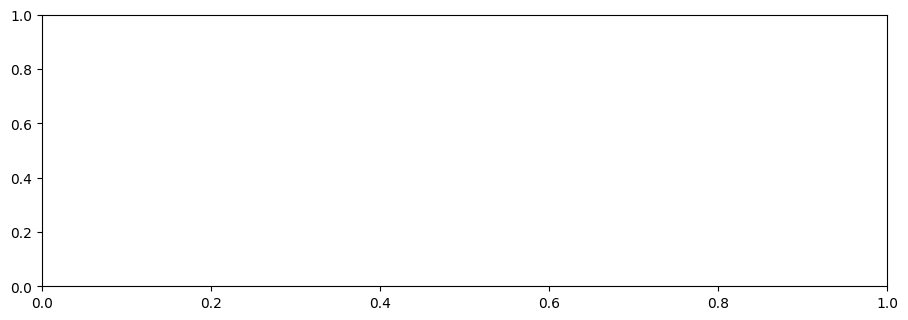

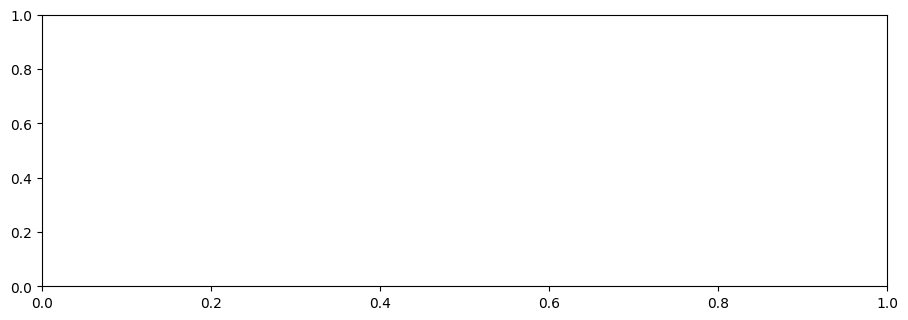

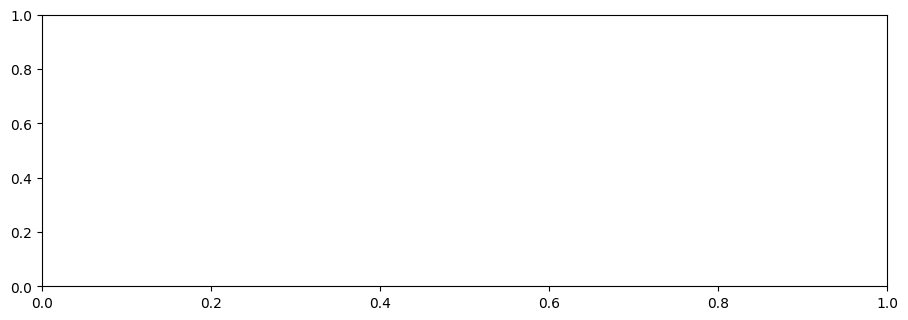

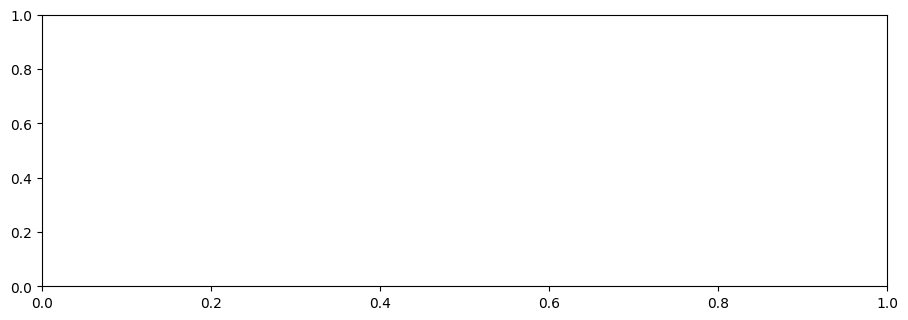

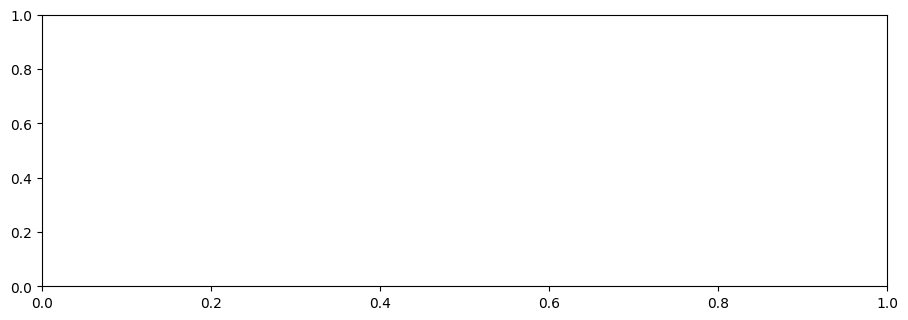

In [ ]:
# Chart - 6 visualization code
# Visualizing all listing’s room type proportions from each neighbourhood group using Plotly API library for graph visualization
import plotly.offline as pyo
import plotly.graph_objs as go

#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#C0C0C0'}

#Grouping the room type using 'neighbourhood_group' as an index
airbnb_types=airbnb_df.groupby(['neighbourhood_group', 'room_type']).size()

#Creating function to plot room type proportion on all region area
for region in airbnb_df.neighbourhood_group.unique():

    plt.figure(figsize=(24,12))

    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values


    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region, textfont_size=15, titlefont_size=25)
    reg_ch.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.10,
    ))
    reg_ch.show()



##### 1. Why did you pick the specific chart?

Answer Here:-From above charts each location can be seperately analysed based on their proportions of room categorized.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The proportions of room categorized can be easily understood of each and every location.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-From above insights,the proportions analyzed of categories,will be thought of , and in which proportion the Profits are increasing of the city.

#### Chart - 7

[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

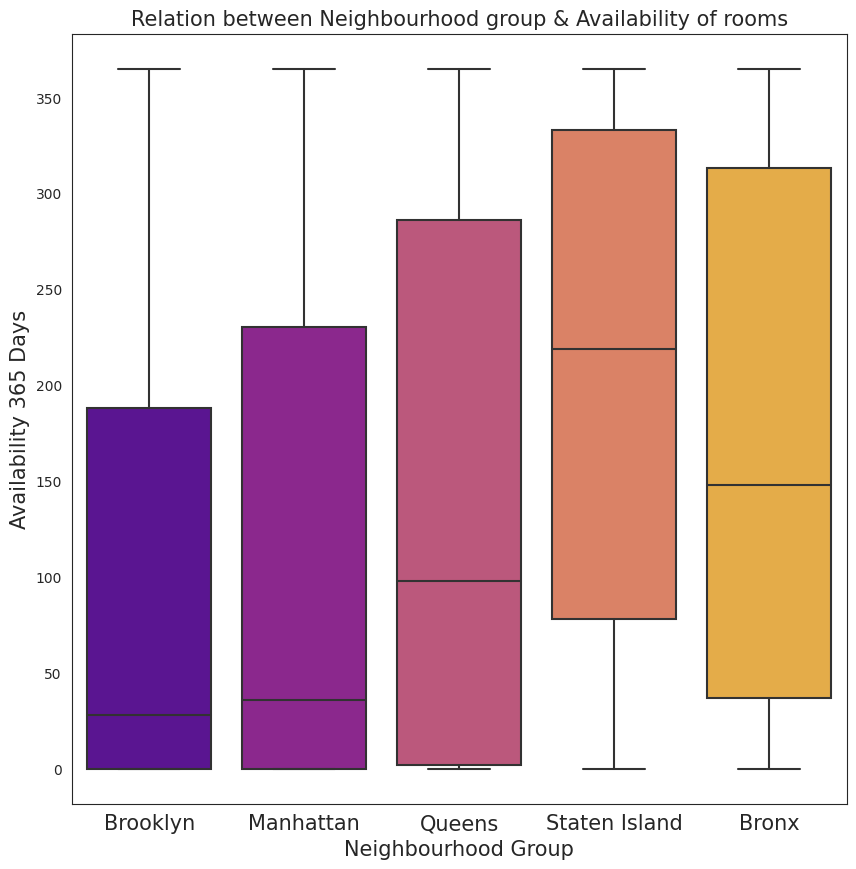

In [ ]:
# Chart - 7 visualization code
#Finding Relation between neighbourhood group and availability of rooms
plt.figure(figsize=(10,10))
sns.set_style('white')

ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

##### 1. Why did you pick the specific chart?

Answer Here:-A box plot is a chart that shows data from a five-number summary.It includes Minimum value,First Quartile (Q1),Median,Third Quartile (Q3),Maximum value,Interquartile Range (IQR) and outlier.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Staten Island's median value is much higher than others.Lower Quartile of Brooklyn,Manhattan and Queens Island is much lower compared to others.Upper Quartile of Staten Island,Bronx are higher compared to others.Which means the prices are much higher in Staten Island,Bronx compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-Lower Quartile of Brooklyn,Manhattan and Queens Island which means median of lower half of the dataset is much lower means they try to provide lower price ranges of property so that every type of consumer w.r.to his budget can avail the room in these cities.By learning these insights the other cities Staten Island and Bronx so that they provide wider range of property so that customer can buy the property as per his budget ,or as per his capability.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
## Finding Top 25 most used words from listing names
#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_df.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [ ]:
# Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]


[('in', 16723),
 ('room', 9383),
 ('bedroom', 7226),
 ('private', 6983),
 ('apartment', 6112),
 ('cozy', 4631),
 ('the', 3866),
 ('to', 3826),
 ('studio', 3770),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3383),
 ('1', 3355),
 ('with', 3092),
 ('2', 3078),
 ('of', 2992),
 ('east', 2966),
 ('and', 2868),
 ('manhattan', 2854),
 ('&', 2820),
 ('park', 2631),
 ('sunny', 2535),
 ('beautiful', 2319),
 ('near', 2293),
 ('williamsburg', 2292)]

In [ ]:
# Cleaning the List by removing prepositions
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25

[('in', 16723),
 ('room', 9383),
 ('bedroom', 7226),
 ('private', 6983),
 ('apartment', 6112),
 ('cozy', 4631),
 ('the', 3866),
 ('to', 3826),
 ('studio', 3770),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3383),
 ('1', 3355),
 ('with', 3092),
 ('2', 3078),
 ('of', 2992),
 ('east', 2966),
 ('and', 2868),
 ('manhattan', 2854),
 ('&', 2820),
 ('park', 2631),
 ('sunny', 2535),
 ('beautiful', 2319),
 ('near', 2293),
 ('williamsburg', 2292)]

In [ ]:
#converting the data into DataFrame
word_count_df = pd.DataFrame(top_25)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_df

,Words,Counts
0,in,16723
1,room,9383
2,bedroom,7226
3,private,6983
4,apartment,6112
5,cozy,4631
6,the,3866
7,to,3826
8,studio,3770
9,brooklyn,3629


[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

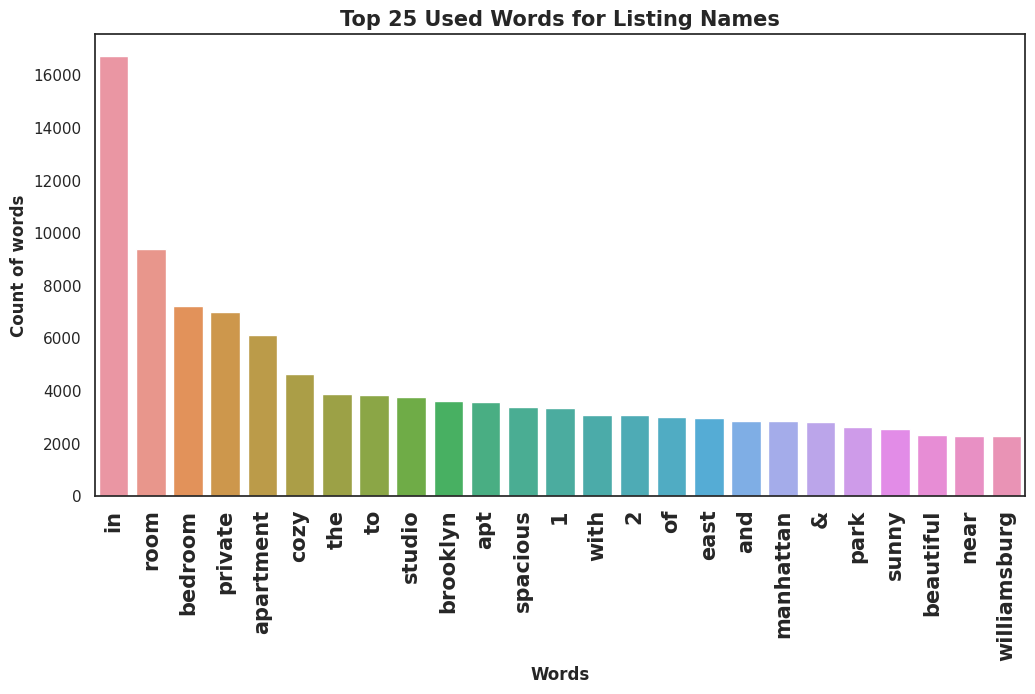

In [ ]:
## Visualizing the findings
#Setting the figure size
sns.set(rc={'figure.figsize':(12,6)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
count_viz = sns.barplot(x='Words',y='Counts', data = word_count_df)

# Naming the Chart
count_viz.set_title('Top 25 Used Words for Listing Names', weight = 'bold').set_fontsize('15')


# Naming X & Y axis
count_viz.set_ylabel('Count of words', weight = 'bold')
count_viz.set_xlabel('Words', weight = 'bold')

#Adjusting Bar labels
count_viz.set_xticklabels(count_viz.get_xticklabels(),rotation = 90, weight = 'bold', size = '15')



##### 1. Why did you pick the specific chart?

Answer Here:-From bar chart we get to know the number of words,with their frequency as well in listing of their names.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-From the listing room ,bedroom words are most used in listing names.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-If new properties are to be added ,then from above insights listing of new properties can be helpful in making new listing names.To become most selling property

#### Chart - 9

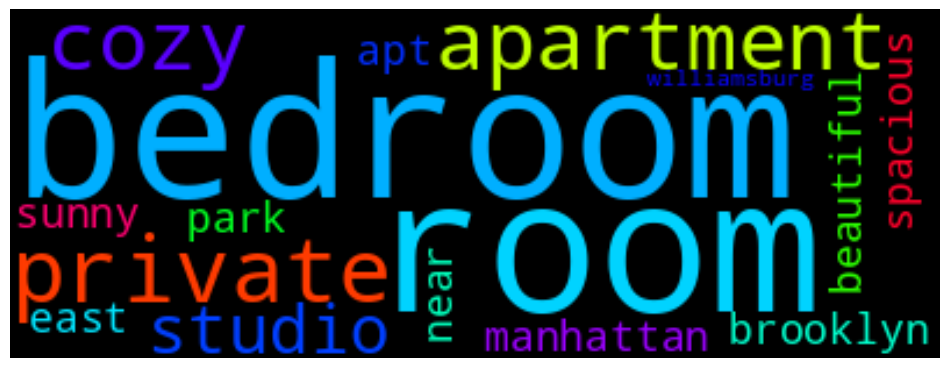

In [ ]:
# Chart - 9 visualization code
## From the chart above, we see the top 25 words used in the listing name. We can use the word cloud visualization method to help us better understand the chart.
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count_df.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80, colormap='hsv', width=400, height=150).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-From word cloud visualization chart we get to know the most used words,which are used in listing of their names.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-From the listing's room ,bedroom words are most used in listing names.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-If new properties are to be added ,then from above insights listing of new properties can be helpful in making new listing names.To become most selling property

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
new=airbnb_df.copy()
new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
new['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# replace whose price less than 50
new.loc[new['price']<50,'price'] = new.loc[(new['price']>50) & (new['price']<80),'price'].median()
new['price'].describe()

count    48858.000000
mean       155.369008
std        239.104348
min         50.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# after removing price less than 100
new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
#  find the maximum price across different host name
top_host=new.groupby(['host_name','host_id'])['price'].sum().reset_index()
top_host.rename(columns={'price':'total_price'},inplace=True)
top_host.head()
#top_host.info()

,host_name,host_id,total_price
0,'Cil,45354224,120
1,(Ari) HENRY LEE,40605120,140
2,(Email hidden by Airbnb),5610823,261
3,(Email hidden by Airbnb),7580102,389
4,(Email hidden by Airbnb),11495251,200


In [ ]:
# find top three host best on their turnover
top_3=top_host.sort_values('total_price',ascending=False).iloc[:3,:3]
top_3

,host_name,host_id,total_price
33209,Sonder (NYC),219517861,82795
4856,Blueground,107434423,70331
31216,Sally,156158778,37097


[Text(0, 0, 'Sonder (NYC)'), Text(1, 0, 'Blueground'), Text(2, 0, 'Sally')]

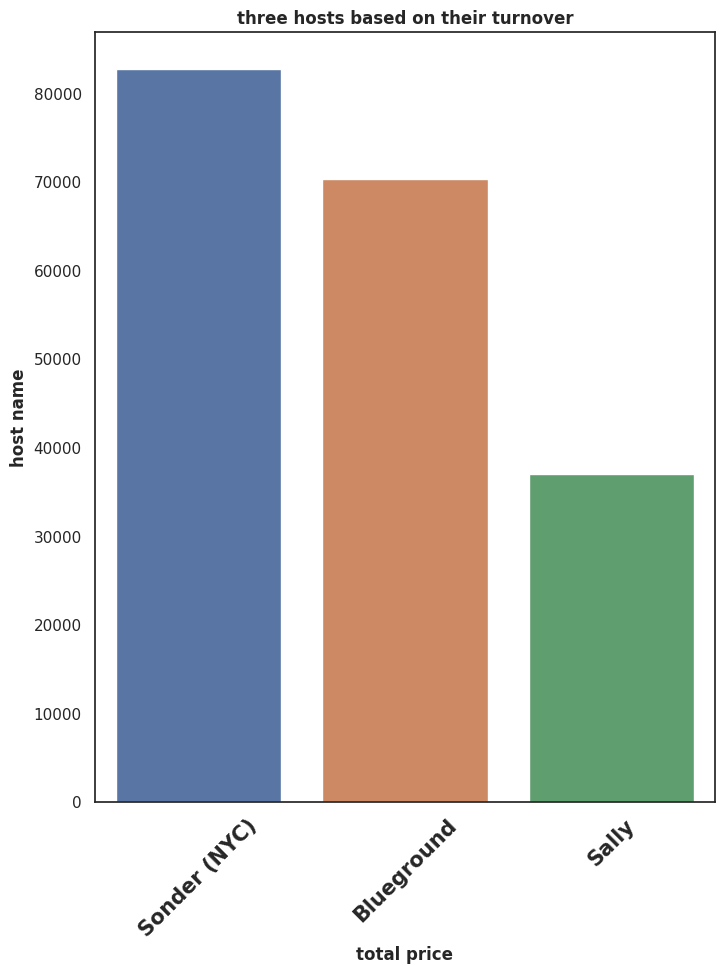

In [ ]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_style('white')
abc= sns.barplot(x='host_name',y='total_price',data = top_3)
abc.set_title('three hosts based on their turnover', weight='bold')
abc.set_ylabel('host name', weight='bold')
abc.set_xlabel('total price', weight='bold')

abc.set_xticklabels(abc.get_xticklabels(),weight='bold',rotation = 45,size='15')

##### 1. Why did you pick the specific chart?

Answer Here:-From bar chart we can compare among different owners of property with their achieved value.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The top 3 turnovers are of Sonder(NYC),Blueground,Sally

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-From the above insights the other property owners may also think of what they have applied different strategies so as to achieve maximum profit .So that they can apply and learn from their strategies to grow their business and gain larger profit.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# Find total no. nights spend per location
#  find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=new.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
final_nights=total_nights.sort_values('minimum_nights',ascending=True)
final_nights.head()

,neighbourhood_group,minimum_nights
4,Staten Island,1802
0,Bronx,4971
3,Queens,29356
1,Brooklyn,121693
2,Manhattan,184792


[Text(0, 0, 'Staten Island'),
 Text(1, 0, 'Bronx'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Brooklyn'),
 Text(4, 0, 'Manhattan')]

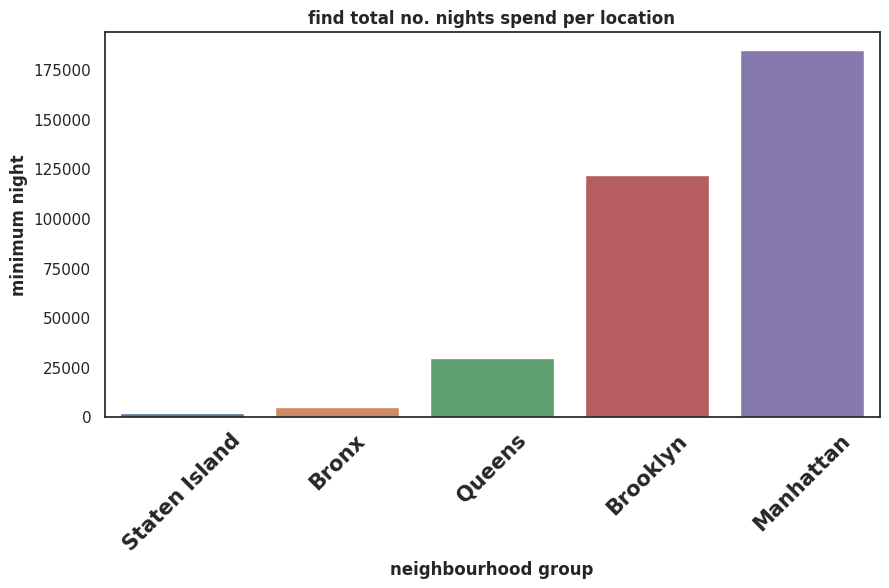

In [ ]:
# visualization of total no. nights spend per location using seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
abc= sns.barplot(x='neighbourhood_group',y='minimum_nights',data = final_nights)
abc.set_title('find total no. nights spend per location', weight='bold')
abc.set_ylabel('minimum night', weight='bold')
abc.set_xlabel('neighbourhood group', weight='bold')

abc.set_xticklabels(abc.get_xticklabels(),weight='bold',rotation = 45,size='15')

##### 1. Why did you pick the specific chart?

Answer Here:-From bar chart ,we can compare total number of nights spend in per neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The majority of people like to stay in Manhattan,Brooklyn and Queens.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-From the above insights we can expand our business more in these neighbourhood group locations (Manhattan,Brooklyn and Queens),so people will most likely to stay over here and we can earn more profits.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
#  find the maximum(minimum nights) spending by customer across different room type
total_room=new.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()

,room_type,minimum_nights
2,Shared room,7510
1,Private room,120023
0,Entire home/apt,215081


In [ ]:
# create dataset
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
# create color parameter
colors=['green','pink','yellow']
# create explode
explode = (0.07, 0.07, 0.07)

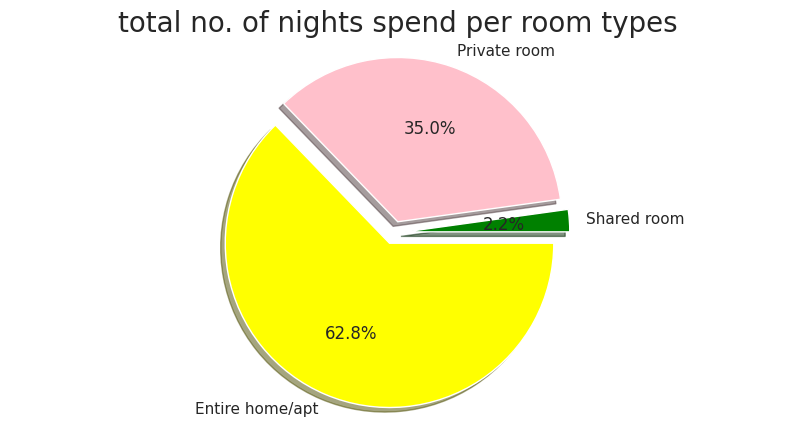

In [ ]:
#creating pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('total no. of nights spend per room types', fontsize=20)
plt.axis("equal")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.All the three categories volume can be seen at glance in one go and that can compared with other ,that how much share it's contributing in whole.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-People most likely to puchase property i.e. 62.8% .
On second people most likely to stay in private room i.e. 35% .
On third people least likely to stay in shared room i.e. 2.2% .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-From above insights people least likely to stay in shared room.So if we increase the number of private rooms and entire home/apt then people will be more likely to puchase the property, this way more profits can be gained.

#### Chart - 13

In [ ]:
# Top ten Highest listing neighourhood
# find listing value of all neighourhood in dataset
neighour=new['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()
#top ten neighourhood with listing value
top_10=neighour[:10]
top_10

#m.rename(columns={'index': 'newName1', 'neighourhood': 'newName2'}, inplace=True)

,index,neighbourhood
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713
2,Harlem,2655
3,Bushwick,2462
4,Upper West Side,1969
5,Hell's Kitchen,1954
6,East Village,1852
7,Upper East Side,1797
8,Crown Heights,1563
9,Midtown,1545


In [ ]:
#make copy of top_10
final_10=top_10.copy()
#rename that dataframe
final_10.rename(columns={'index':'neighourhood','neighbourhood':'listing_value' },inplace=True)

final_10

,neighourhood,listing_value
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713
2,Harlem,2655
3,Bushwick,2462
4,Upper West Side,1969
5,Hell's Kitchen,1954
6,East Village,1852
7,Upper East Side,1797
8,Crown Heights,1563
9,Midtown,1545


[Text(0, 0, 'Williamsburg'),
 Text(1, 0, 'Bedford-Stuyvesant'),
 Text(2, 0, 'Harlem'),
 Text(3, 0, 'Bushwick'),
 Text(4, 0, 'Upper West Side'),
 Text(5, 0, "Hell's Kitchen"),
 Text(6, 0, 'East Village'),
 Text(7, 0, 'Upper East Side'),
 Text(8, 0, 'Crown Heights'),
 Text(9, 0, 'Midtown')]

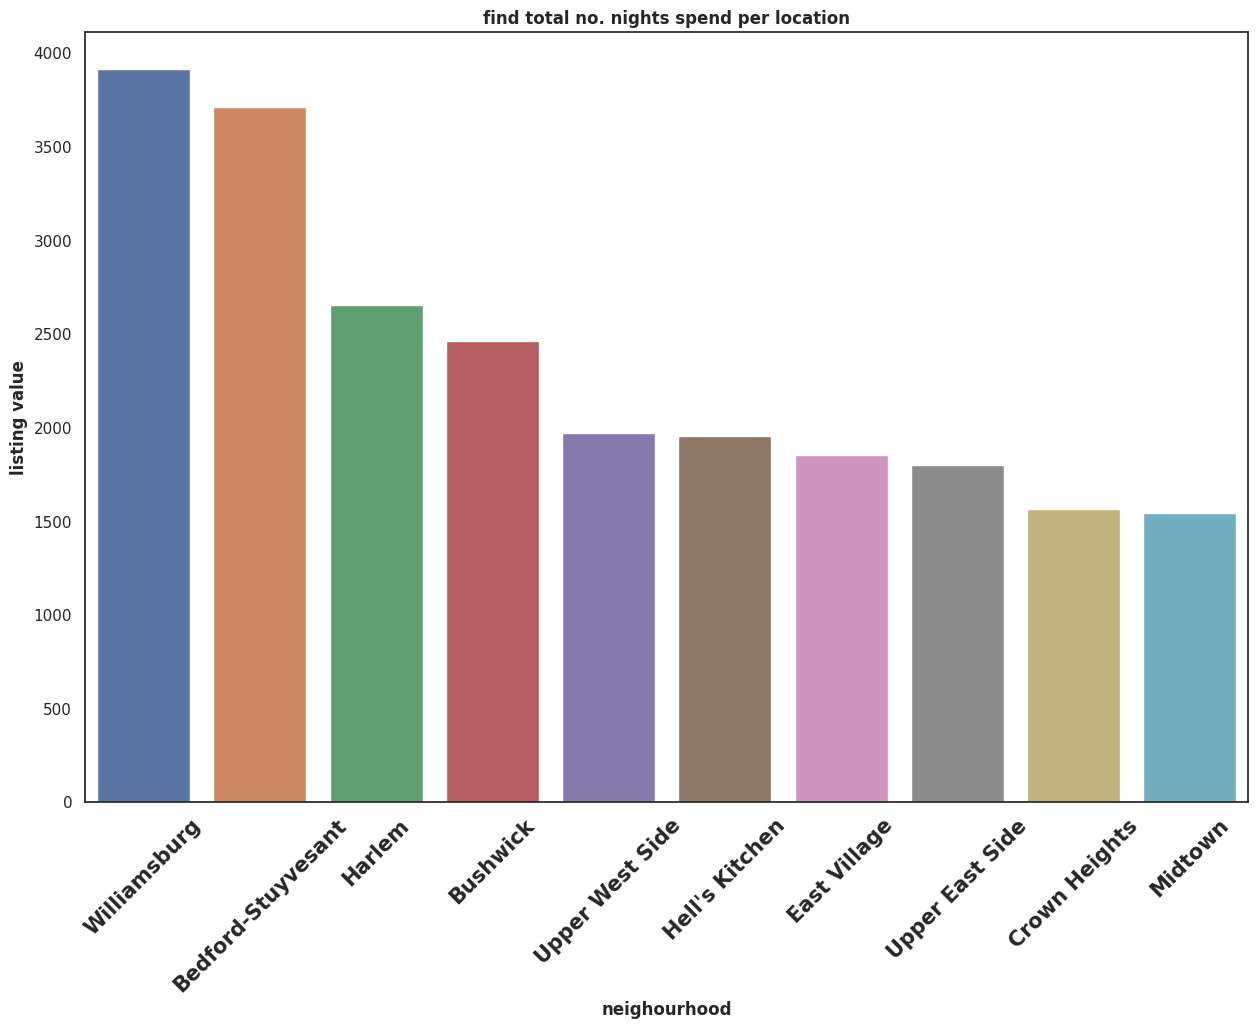

In [ ]:
# data visualizing with barplot
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('white')
#Plotting the Chart
abc= sns.barplot(x='neighourhood', y='listing_value',data = final_10)
abc.set_title('find total no. nights spend per location', weight='bold')
# Naming X & Y axis
abc.set_ylabel('listing value', weight='bold')
abc.set_xlabel('neighourhood', weight='bold')
#Adjusting Bar labels

abc.set_xticklabels(abc.get_xticklabels(),weight='bold',rotation = 45,size='15')

##### 1. Why did you pick the specific chart?

Answer Here:- From bar chart ,we can compare total number of nights spend per location.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The majority of people like to stay in Williamsburg,Bedford-Stuyesant,Harlem and Bushwick.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-From the above insights we can expand our business more in these locations (Williamsburg,Bedford-Stuyesant,Harlem and Bushwick),so people will most likely to stay over here and we can earn more profits.

#### Chart - 14 - Correlation Heatmap

<ipython-input-76-4158c60a2fd6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-76-4158c60a2fd6>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                                      id   host_id     price  minimum_nights  \
id                              1.000000  0.588221  0.012898       -0.012038   
host_id                         0.588221  1.000000  0.018089       -0.017027   
price                           0.012898  0.018089  1.000000        0.043607   
minimum_nights                 -0.012038 -0.017027  0.043607        1.000000   
number_of_reviews              -0.320020 -0.140273 -0.049160       -0.081610   
calculated_host_listings_count  0.133224  0.154954  0.057139        0.131313   
availability_365                0.085616  0.203743  0.082169        0.145953   

                                number_of_reviews  \
id                                      -0.320020   
host_id                                 -0.140273   
price                                   -0.049160   
minimum_nights                          -0.081610   
number_of_reviews                        1.000000   
calculated_host_listings_count          -

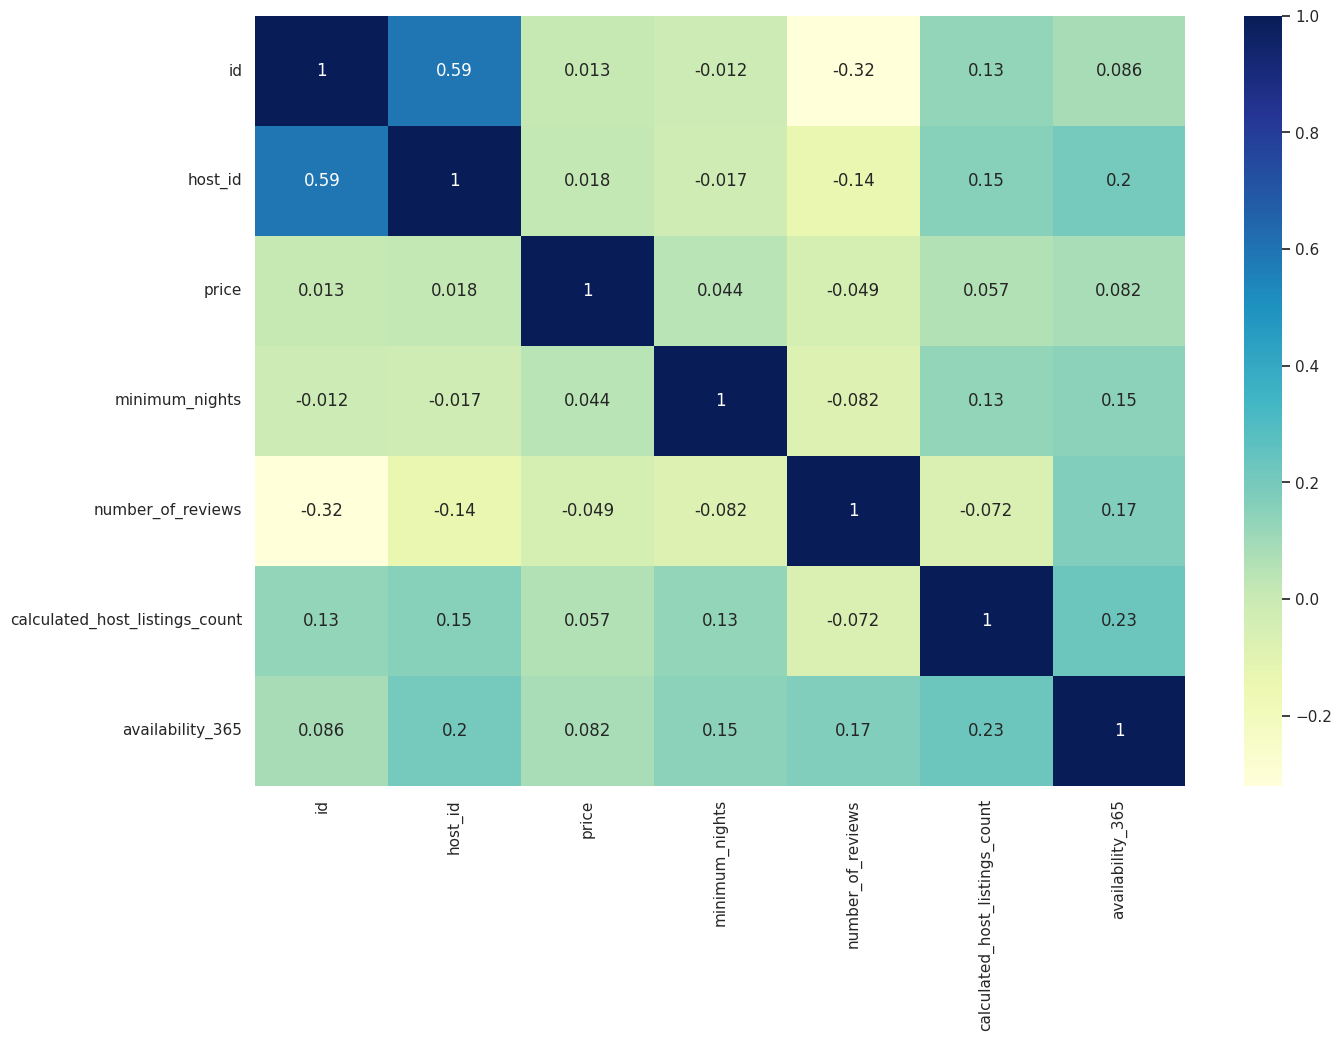

In [ ]:
# Correlation Heatmap visualization code
print(new.corr())
# plotting correlation heatmap
dataplot = sns.heatmap(new.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-Because,A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It’s like a color chart that shows us how closely related different variables are.

In a correlation heatmap, each variable is represented by a row and a column, and the cells show the correlation between them. The color of each cell represents the strength and direction of the correlation, with darker colors indicating stronger correlations.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The correlation between price and minimum nights spend is 0.044,which is very less ,that should be more so as to earn more profit and it should be affordable to customer as well so as to attract more customers to stay in the Property.

#### Chart - 15 - Pair Plot

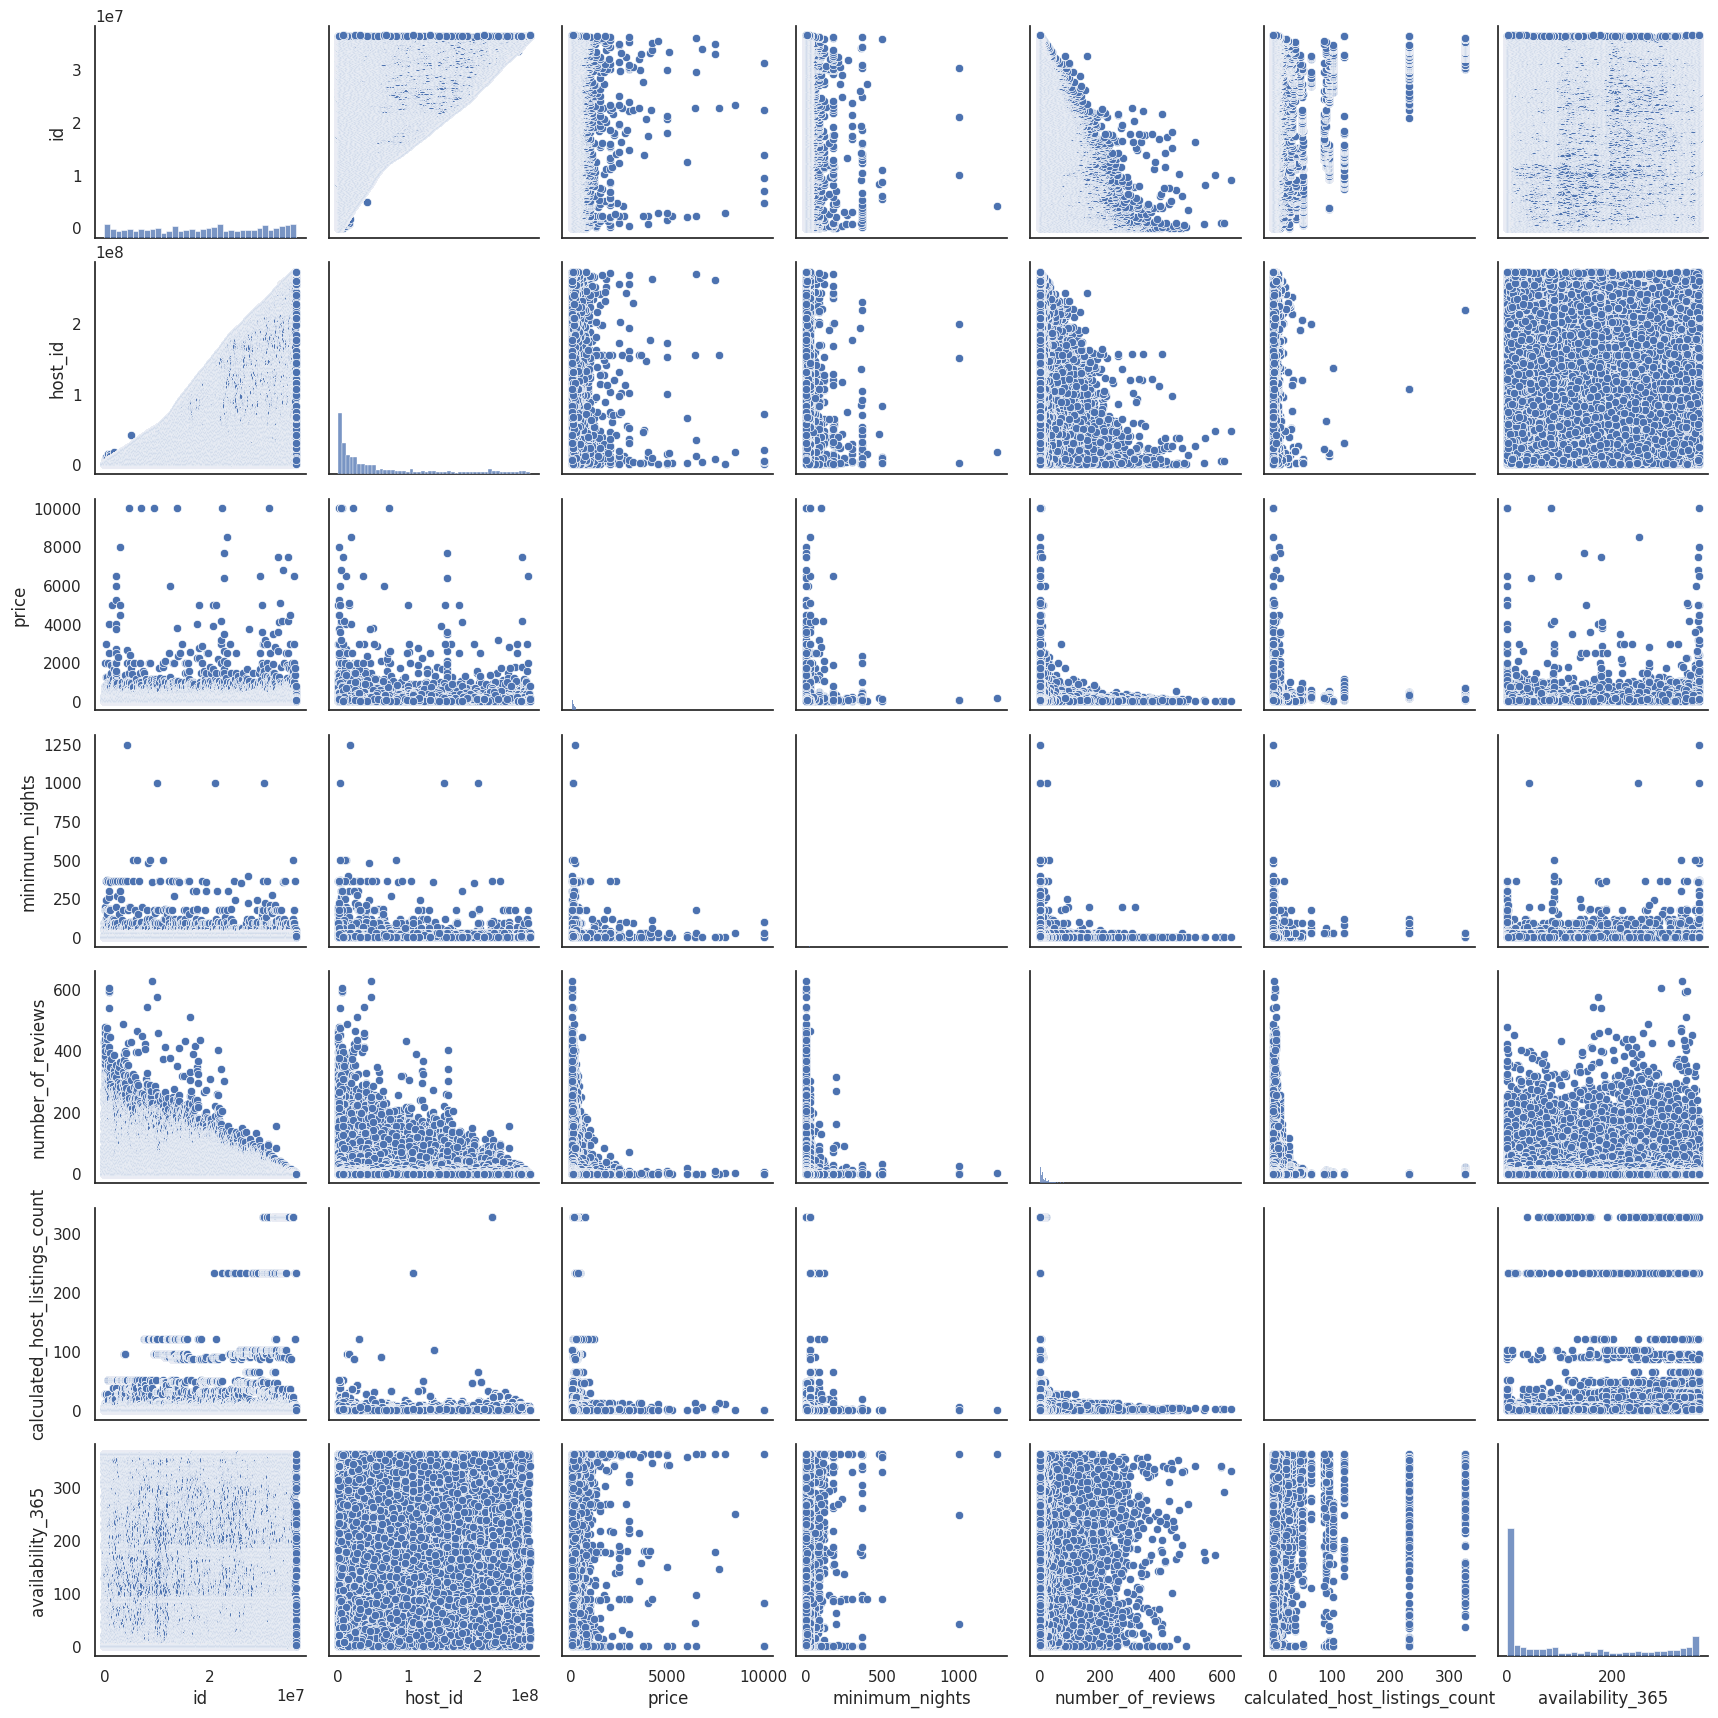

In [ ]:
# Pair Plot visualization code
sns.pairplot(new)

##### 1. Why did you pick the specific chart?

Answer Here:-Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The relationship between the price and availabilty_365 aren't vary widely distributed.Means the property remains unavaiable for most of time.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

Answer Here:-The property should be available most of time for consumers.There should be wide range of property available as per customers Budget Plan in the city so its affordable for customer as well.The distribution of categories of property should be changed .So as to earn more profit.

# **Conclusion**


*   Manhattan is the most focused place in New York for hosts to do their business
*   Customers pay highest amount in Brooklyn,Queens and Manhattan that is 10,000 and lowest amount is 10$.

*   For the three types of room type (i.e. Entire home, Shared room, & Private room) average price of entire home is around $157, for shared room is around 60, and for private room is around 75.
* 'Entire home/apt' room type has the highest number of listing of 52% and ‘Shared Room’ is the least listed room type at only 2.4% in total.
* People stay for longer duration of time in Private rooms in Brooklyn and Manhattan.
*Words such as ‘bedroom’, ‘cozy’, ‘private’, ‘apartment’ and ‘spacious’ are used          more frequently than words such as ‘park’, ‘near’, ‘village’ and ‘heart’.
*Count of listing by top 10 hosts is almost 2.5%(1270 listings) of the whole dataset.
*Top three host base on their turnover are Sonder(nyc),Red awning, Henry and best host is Sonder(nyc)
*More customer preferred Manhattan location for night stay then Brooklyn
*63.2% customer  spend night in Entire home and 1.6% spend night in Shared room

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***